In [5]:

##  基础函数库
import numpy as np
import pandas as pd

print("123")

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

## 载入数据
data = pd.read_csv('./train.csv')

123


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [7]:
numerical_features = [x for x in data.columns if data[x].dtype == float]
category_features = [x for x in data.columns if data[x].dtype != float and x != 'RainTomorrow']

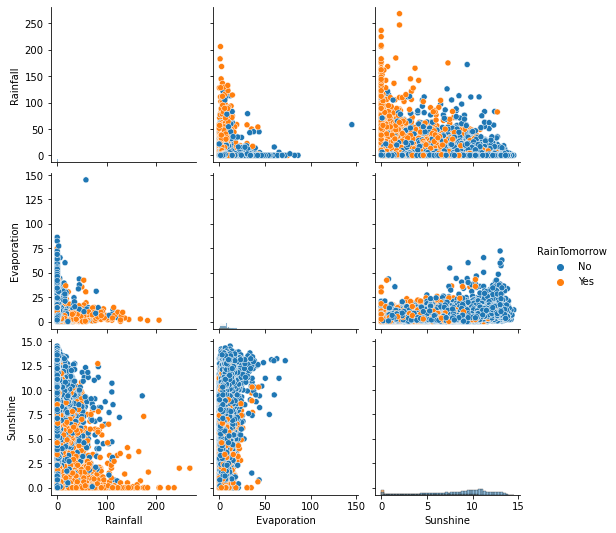

In [8]:
## 选取三个特征与标签组合的散点可视化
sns.pairplot(data=data[['Rainfall',
                        'Evaporation',
                        'Sunshine'] + ['RainTomorrow']], diag_kind='hist', hue='RainTomorrow')
plt.show()


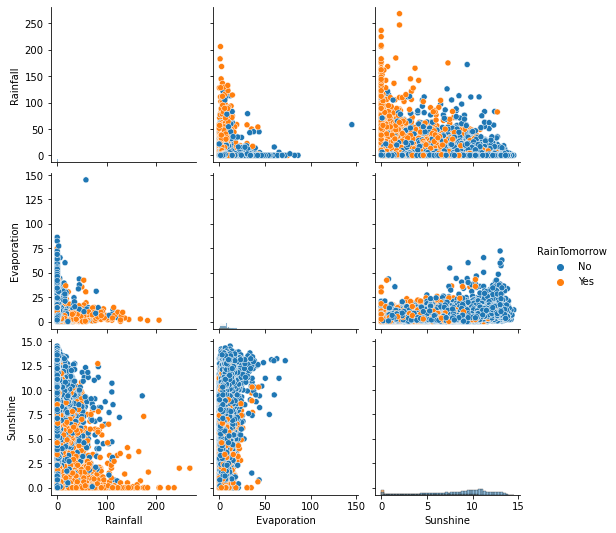

In [9]:
## 选取三个特征与标签组合的散点可视化
sns.pairplot(data=data[['Rainfall',
                        'Evaporation',
                        'Sunshine'] + ['RainTomorrow']], diag_kind='hist', hue='RainTomorrow')
plt.show()


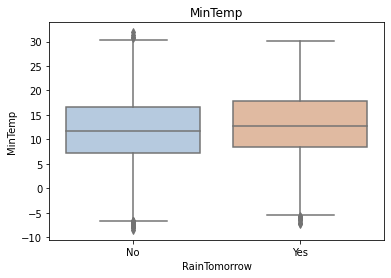

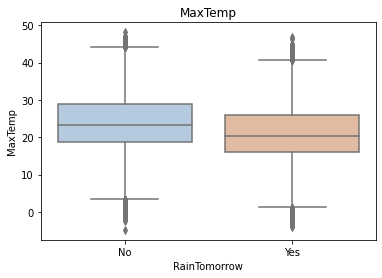

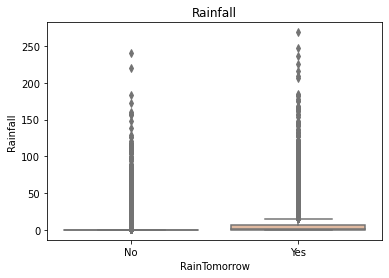

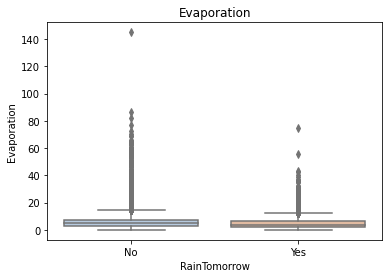

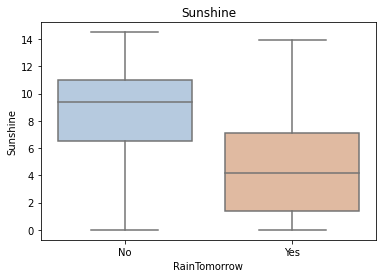

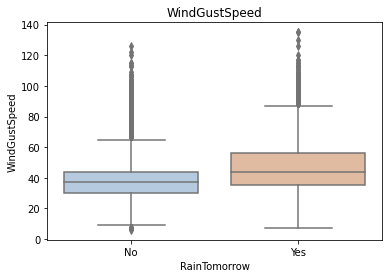

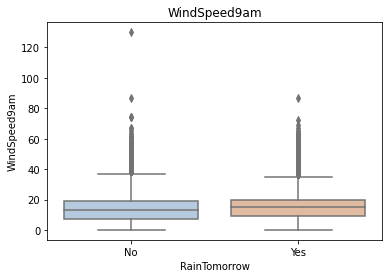

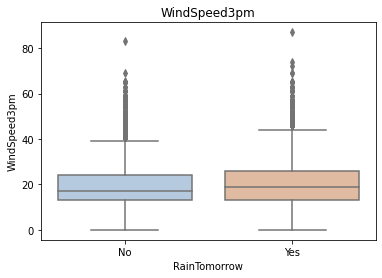

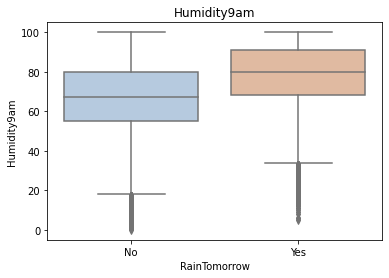

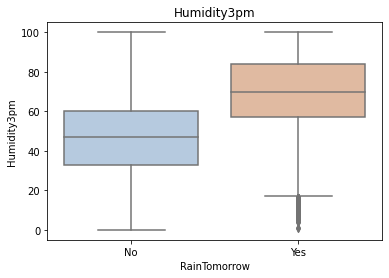

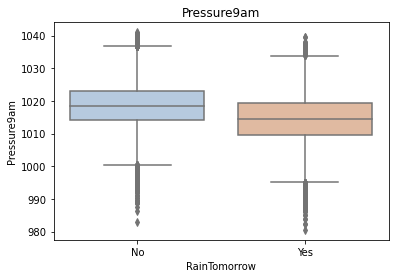

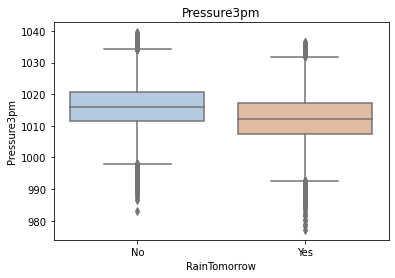

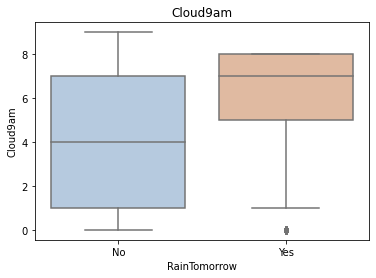

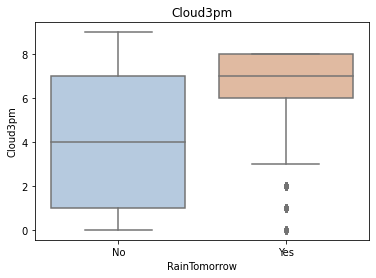

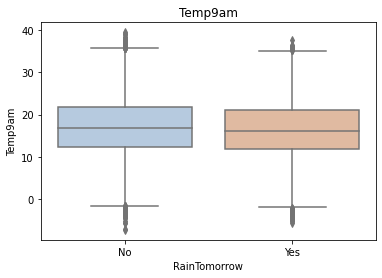

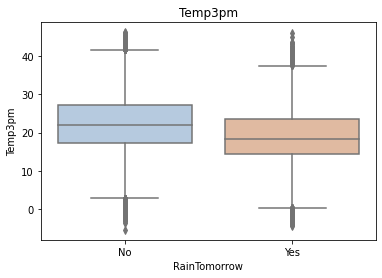

In [10]:
for col in data[numerical_features].columns:
    if col != 'RainTomorrow':
        sns.boxplot(x='RainTomorrow', y=col, saturation=0.5,
                    palette='pastel', data=data)
        plt.title(col)
        plt.show()


In [11]:
tlog = {}
for i in category_features:
    tlog[i] = data[data['RainTomorrow'] == 'Yes'][i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data[data['RainTomorrow'] == 'No'][i].value_counts()


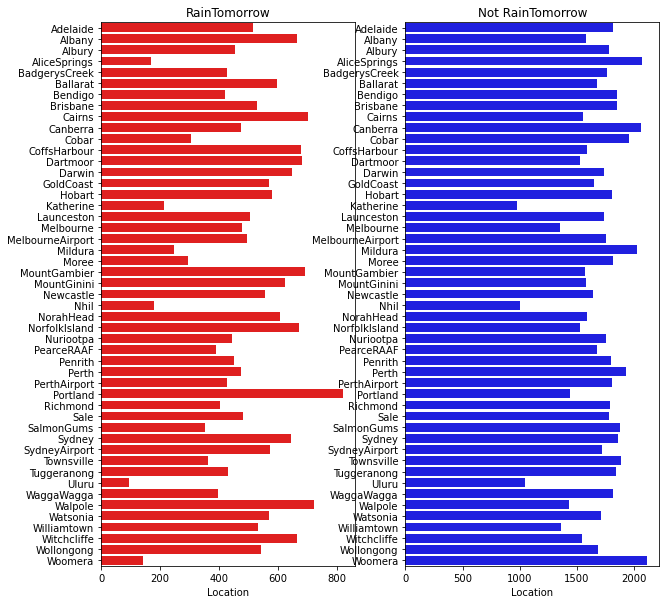

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.barplot(x=pd.DataFrame(tlog['Location']).sort_index()[
            'Location'], y=pd.DataFrame(tlog['Location']).sort_index().index, color="red")
plt.subplot(1, 2, 2)
plt.title('Not RainTomorrow')
sns.barplot(x=pd.DataFrame(flog['Location']).sort_index()[
            'Location'], y=pd.DataFrame(flog['Location']).sort_index().index, color="blue")
plt.show()


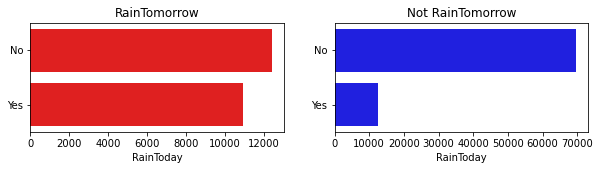

In [13]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.barplot(x=pd.DataFrame(tlog['RainToday'][:2]).sort_index()[
            'RainToday'], y=pd.DataFrame(tlog['RainToday'][:2]).sort_index().index, color="red")
plt.subplot(1, 2, 2)
plt.title('Not RainTomorrow')
sns.barplot(x=pd.DataFrame(flog['RainToday'][:2]).sort_index()[
            'RainToday'], y=pd.DataFrame(flog['RainToday'][:2]).sort_index().index, color="blue")
plt.show()


In [14]:
## 把所有的相同类别的特征编码为同一个值
def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(),
                    range(len(x.unique().tolist()))))

    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return mapfunction


for i in category_features:
    data[i] = data[i].apply(get_mapfunction(data[i]))


In [15]:
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data['RainTomorrow']
data_features_part = data[[x for x in data.columns if x != 'RainTomorrow']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(
    data_features_part, data_target_part, test_size=0.2, random_state=2020)


In [16]:
## 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)


[15:52:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The accuracy of the Logistic Regression is: 0.8982359491296958
The accuracy of the Logistic Regression is: 0.856392704768156
The confusion matrix result:
 [[15661  2171]
 [  892  2605]]


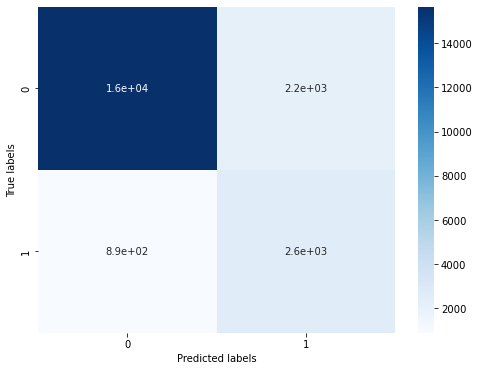

In [17]:
## 在训练集和测试集上分布利用训练好的模型进行预测
from sklearn import metrics
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_test, test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


<AxesSubplot:>

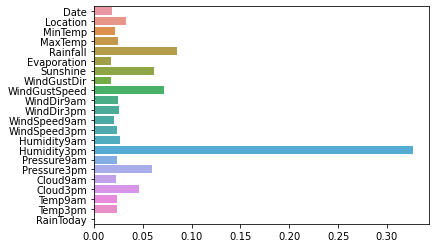

In [18]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)


/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


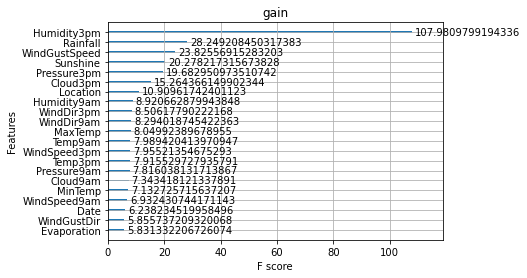

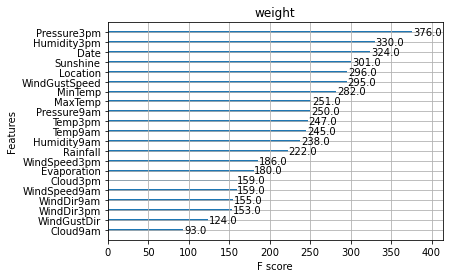

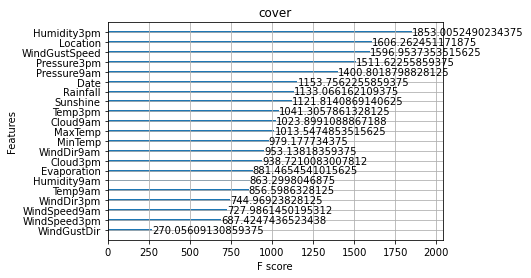

acc= 0.856392704768156


In [19]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance


def estimate(model, data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1 = plot_importance(model, importance_type="gain")
    ax1.set_title('gain')
    ax2 = plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()


def classes(data, label, test):
    model = XGBClassifier()
    model.fit(data, label)
    ans = model.predict(test)
    estimate(model, data)
    return ans


ans = classes(x_train, y_train, x_test)
pre = accuracy_score(y_test, ans)
print('acc=', accuracy_score(y_test, ans))


In [20]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3, 5, 8]

parameters = {'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators=50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3,
                   scoring='accuracy', verbose=1, n_jobs=-1)
clf = clf.fit(x_train, y_train)

In [21]:
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.3,
 'max_depth': 5,
 'subsample': 0.9}

/Users/evan/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the Logistic Regression is: 0.8813338803258512
The accuracy of the Logistic Regression is: 0.8565333583384125
The confusion matrix result:
 [[15692  2199]
 [  861  2577]]


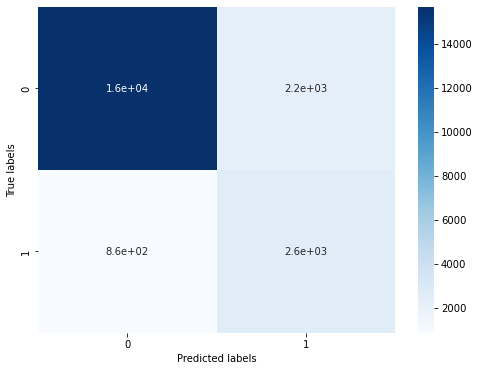

In [22]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型
clf = XGBClassifier(colsample_bytree=0.6, learning_rate=0.3,
                    max_depth=5, subsample=0.9)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the Logistic Regression is:',
      metrics.accuracy_score(y_test, test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
